In [1]:
import numpy as np
import pandas as pd
from pyod.models.mcd import MCD
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('Cancer_data.csv')

In [21]:
df.shape

(569, 30)

In [3]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_M = df[df['diagnosis']=='M']
df_M.drop(['diagnosis'], axis=1, inplace=True)
df_B = df[df['diagnosis']=='B']
df_B.drop(['diagnosis'], axis=1, inplace=True)

/var/folders/fv/v_0bdk613x9bss7mpw__vsnr0000gn/T/ipykernel_46201/3723686823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M.drop(['diagnosis'], axis=1, inplace=True)
/var/folders/fv/v_0bdk613x9bss7mpw__vsnr0000gn/T/ipykernel_46201/3723686823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B.drop(['diagnosis'], axis=1, inplace=True)


In [6]:
df.drop(['diagnosis'], axis=1, inplace=True)

In [7]:
df_M.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [8]:
df_B.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [9]:
mcd_M = MCD(random_state=42)
mcd_B = MCD(random_state=42)

In [10]:
mcd_M.fit(df_M)
mcd_B.fit(df_B)

MCD(assume_centered=False, contamination=0.1, random_state=42,
  store_precision=True, support_fraction=None)

In [11]:
outliers_M = mcd_M.predict(df_M)
outliers_B = mcd_M.predict(df_B)

In [12]:
outlier_M = df_M[outliers_M==1]
non_outlier_M = df_M[outliers_M==0]
outlier_B = df_B[outliers_B==1]
non_outlier_B = df_B[outliers_B==0]

In [13]:
tsne_outlier = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_non_outlier = TSNE(n_components=2, perplexity=10, random_state=42)

In [14]:
extracted_outlier_M = tsne_outlier.fit_transform(outlier_M)
extracted_non_outlier_M = tsne_non_outlier.fit_transform(non_outlier_M)
extracted_outlier_B = tsne_outlier.fit_transform(outlier_B)
extracted_non_outlier_B = tsne_non_outlier.fit_transform(non_outlier_B)

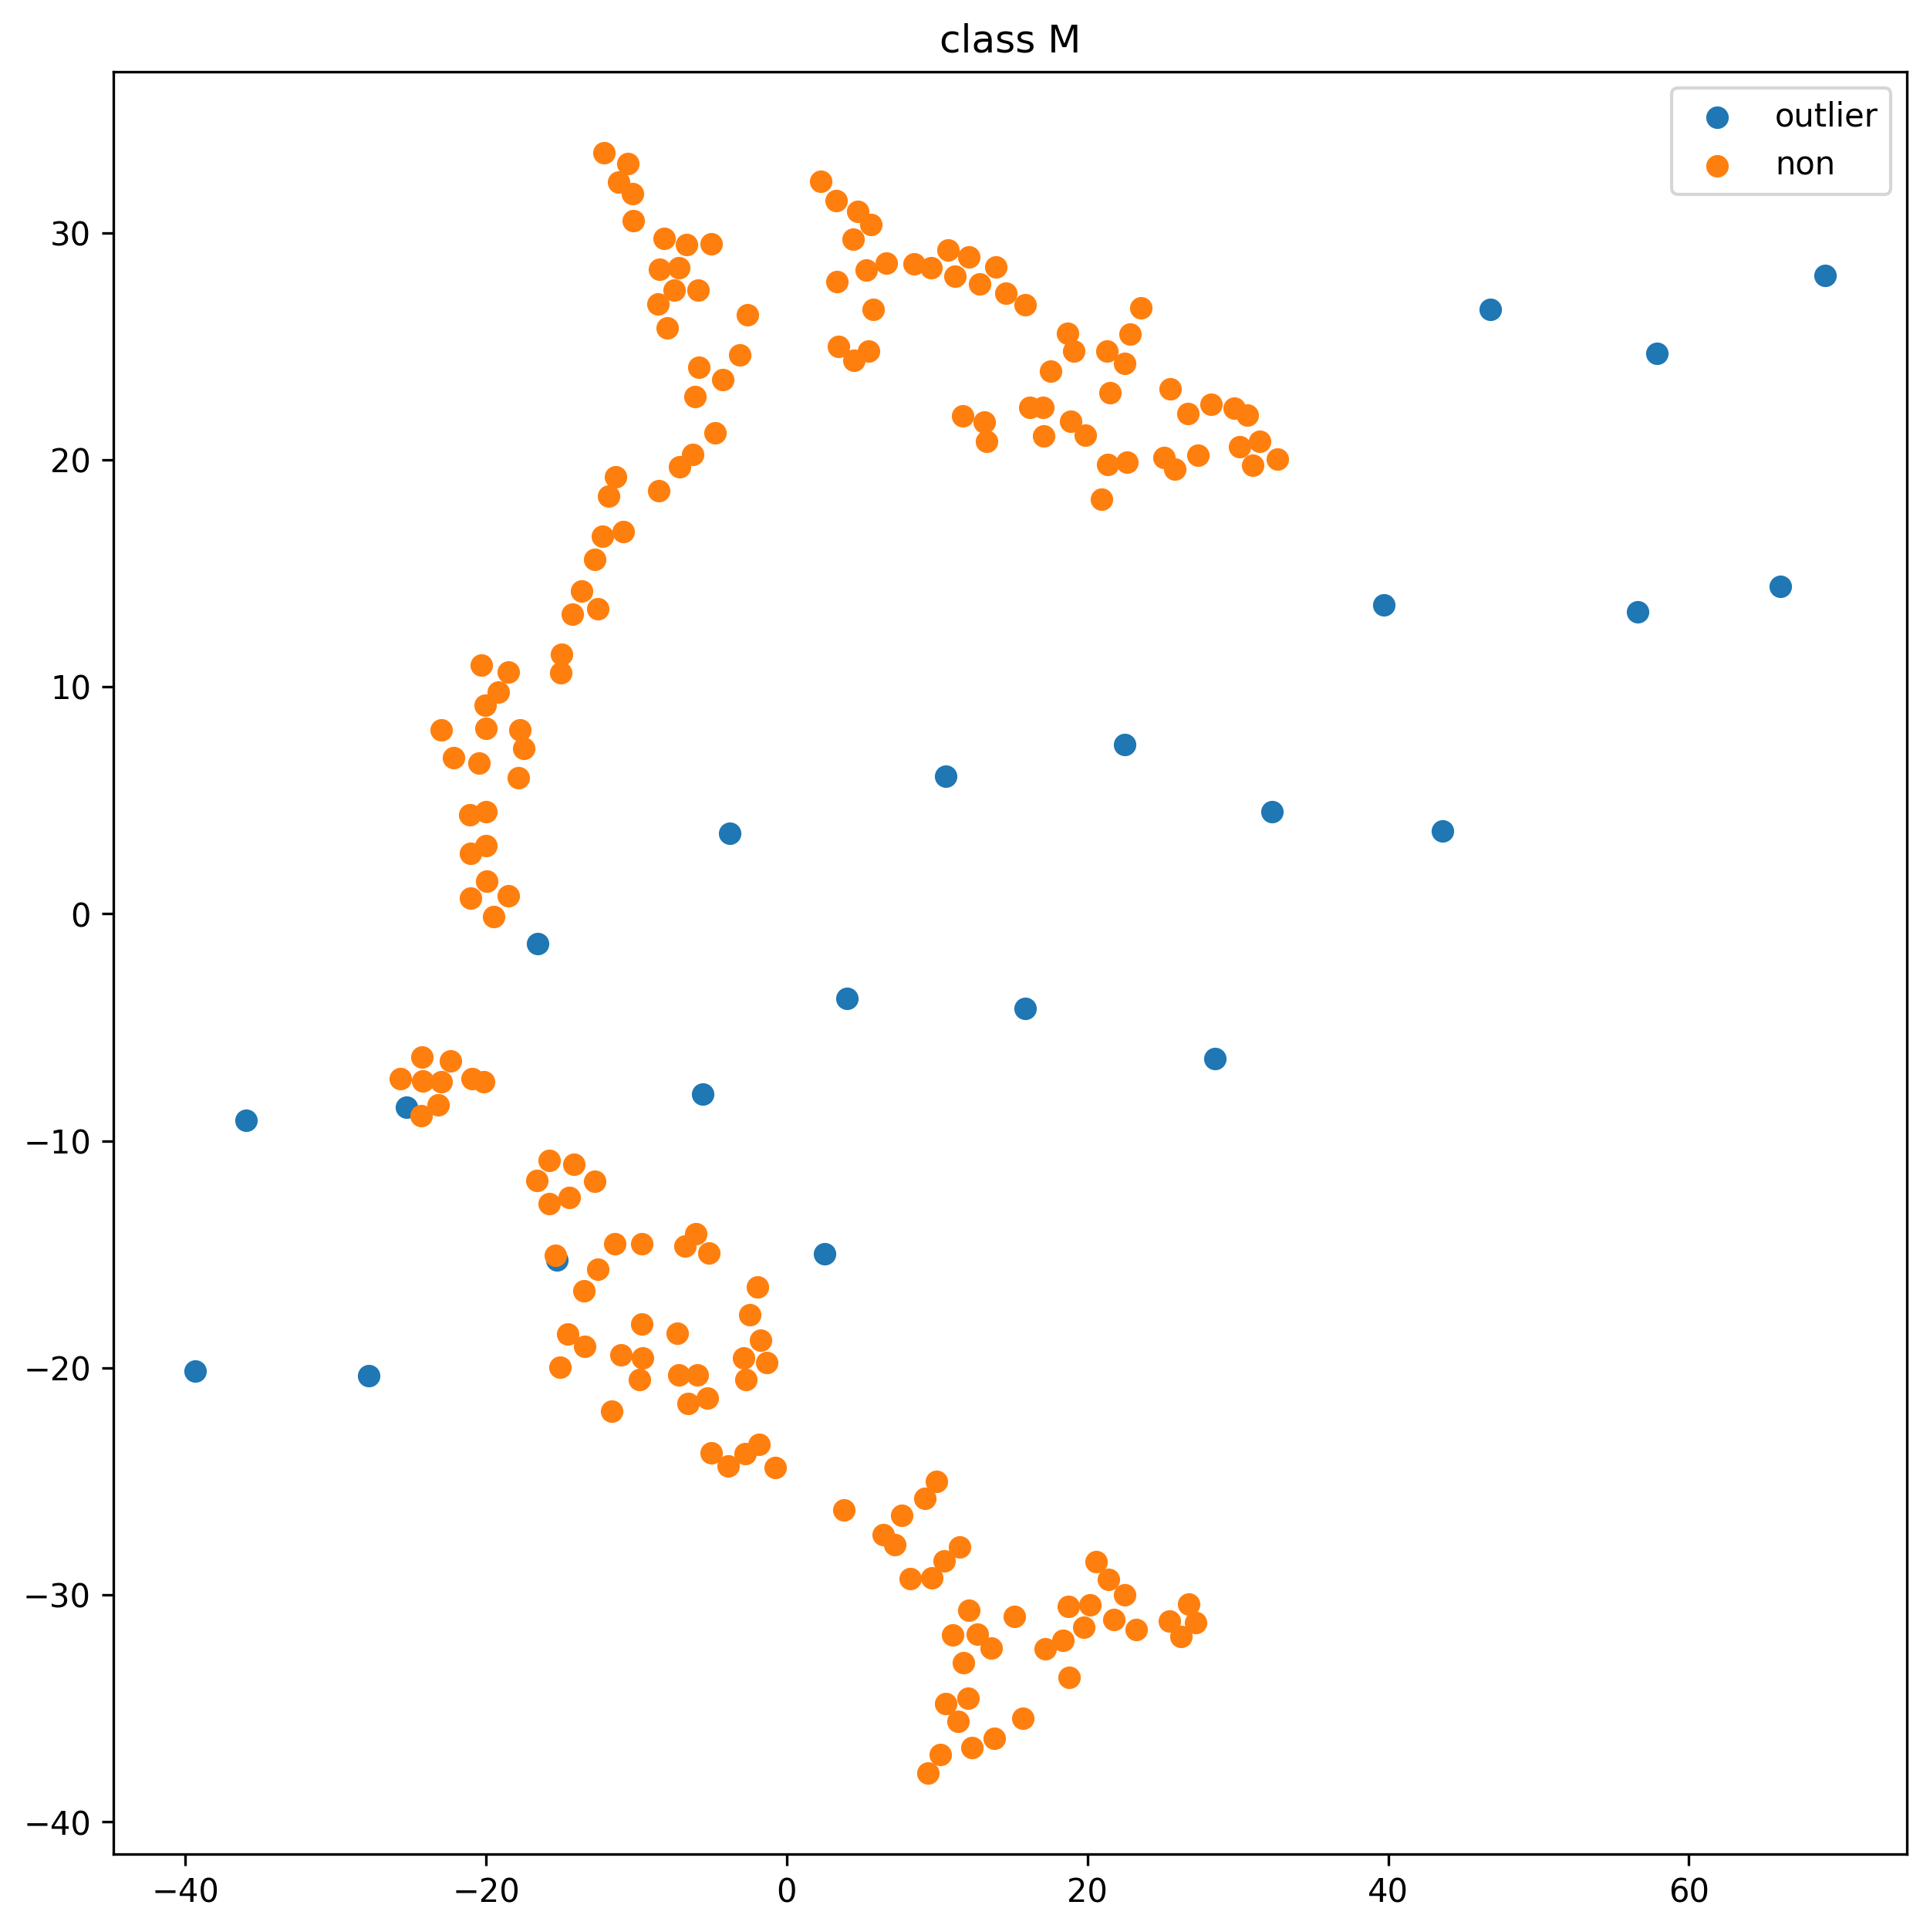

In [17]:
plt.figure(figsize=(10,10), dpi=300)
plt.title('class M')
plt.scatter(extracted_outlier_M[:,0], extracted_outlier_M[:,1], label='outlier')
plt.scatter(extracted_non_outlier_M[:,0], extracted_non_outlier_M[:,1], label='non')
plt.legend()
plt.show()

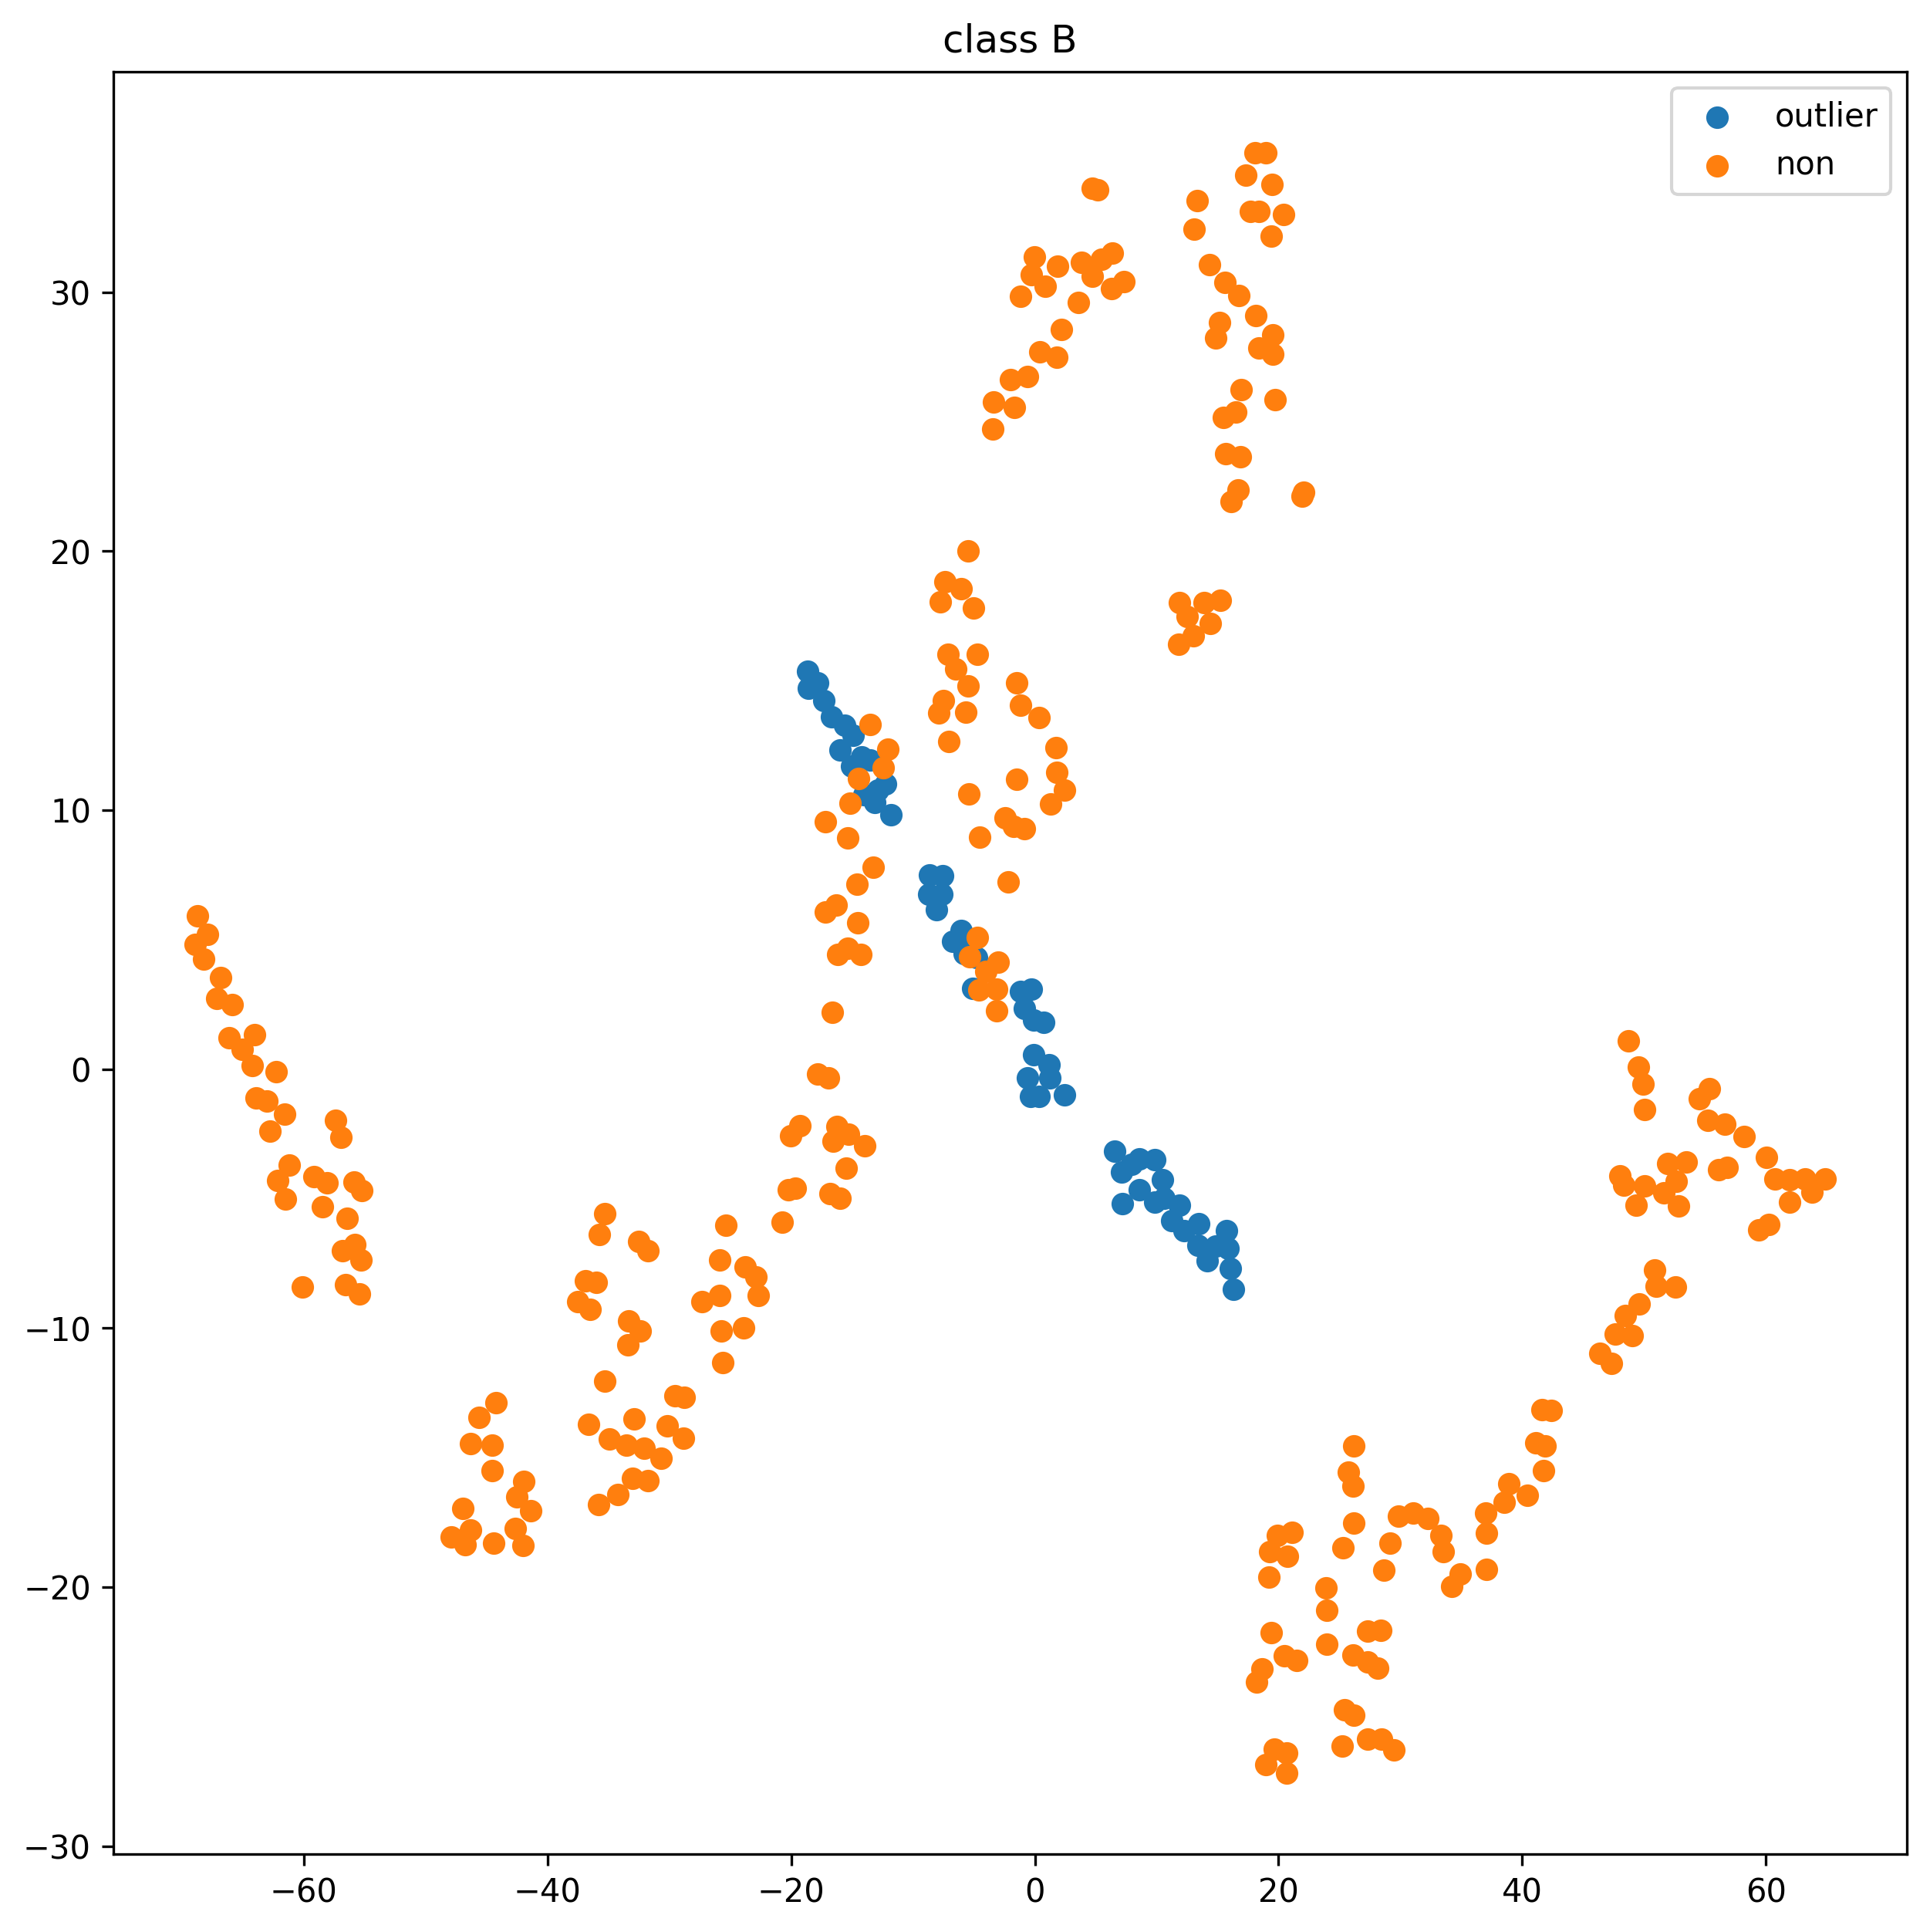

In [18]:
plt.figure(figsize=(10,10), dpi=300)
plt.title('class B')
plt.scatter(extracted_outlier_B[:,0], extracted_outlier_B[:,1], label='outlier')
plt.scatter(extracted_non_outlier_B[:,0], extracted_non_outlier_B[:,1], label='non')
plt.legend()
plt.show()

In [29]:
non_outlier_M['diagonosis'] = 'M'
non_outlier_B['diagonosis'] = 'B'

/var/folders/fv/v_0bdk613x9bss7mpw__vsnr0000gn/T/ipykernel_46201/3011033833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_M['diagonosis'] = 'M'
/var/folders/fv/v_0bdk613x9bss7mpw__vsnr0000gn/T/ipykernel_46201/3011033833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_B['diagonosis'] = 'B'


In [30]:
removed_outlier = pd.concat([non_outlier_M, non_outlier_B], axis=0).reset_index(drop=True)

In [31]:
removed_outlier

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagonosis
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,M
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,M
2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,M
3,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,M
4,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242,B
483,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283,B
484,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004,B
485,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.1298,0.2517,0.3630,0.09653,0.2112,0.08732,B


In [32]:
removed_outlier.to_csv('Cancer_data_removed_outliers.csv')